In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('../data/df_analyze.csv')

In [3]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
df = df[["Impressions", "From Home", "From Hashtags", "From Explore", "From Other", "Saves", "Comments", "Shares", "Likes", "Profile Visits", "Follows"]]
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,3920,2586,1028,619,56,98,9,5,162,35,2
1,5394,2727,1838,1174,78,194,7,14,224,48,10
2,4021,2085,1188,0,533,41,11,1,131,62,12
3,4528,2700,621,932,73,172,10,7,213,23,8
4,2518,1704,255,279,37,96,5,4,123,8,0


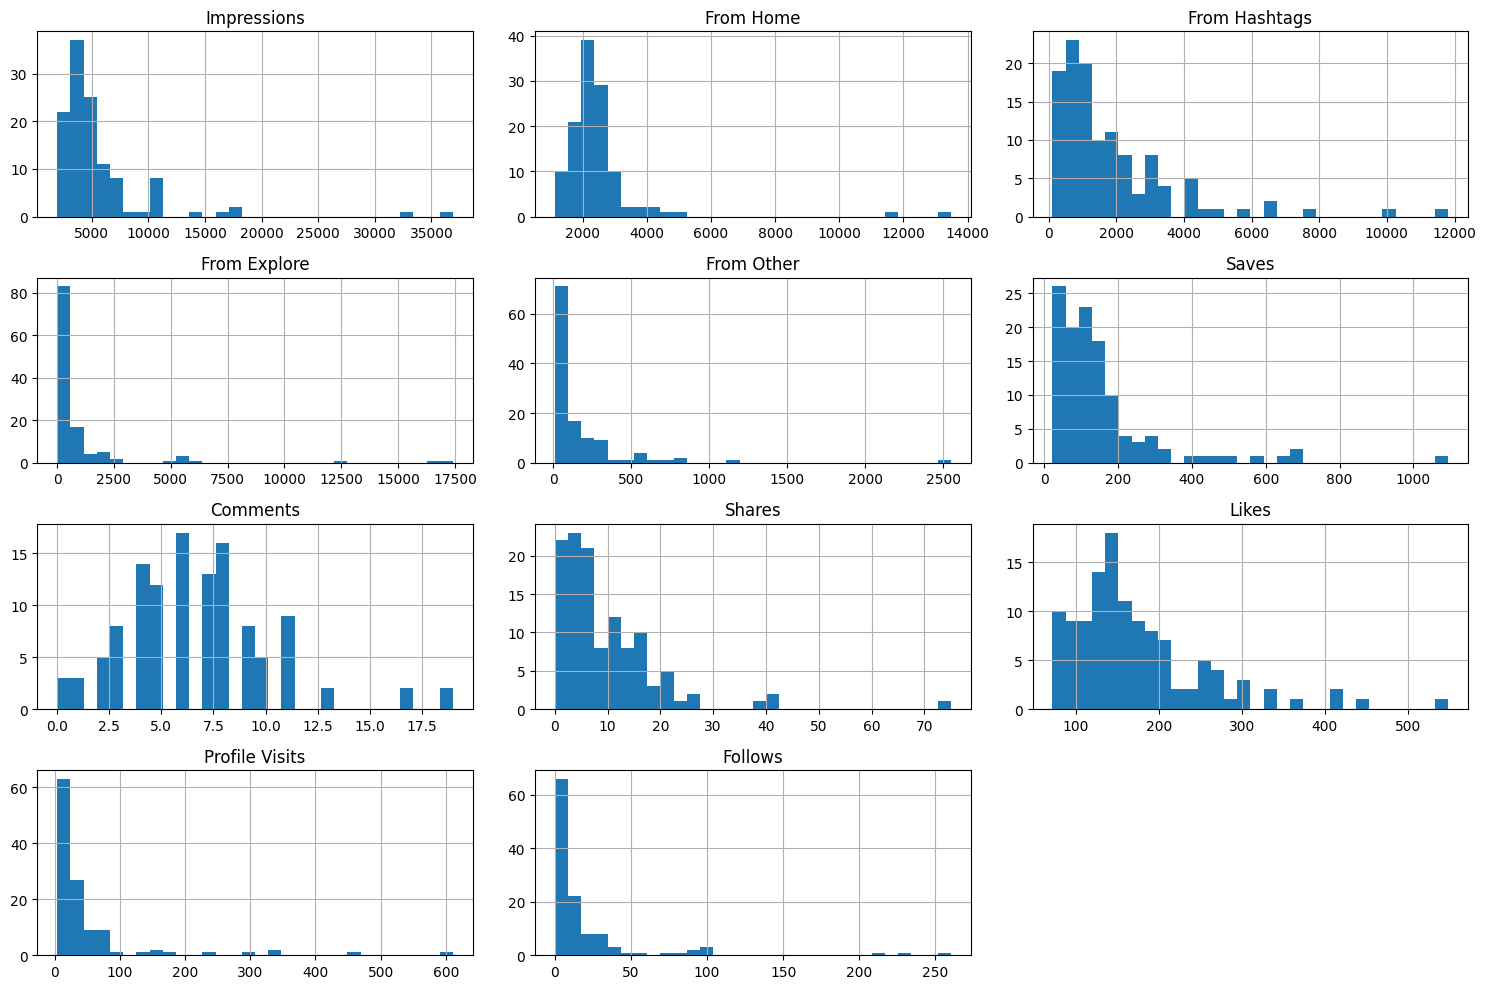

In [5]:
# Plot histograms for all columns
df.hist(bins=30, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

In [6]:
correlations = df.corr()
follows_correlations = correlations["Follows"].sort_values(ascending=False)
print(follows_correlations)

Follows           1.000000
Impressions       0.889363
Profile Visits    0.853152
From Explore      0.796019
Likes             0.746333
From Home         0.672675
Saves             0.628461
From Hashtags     0.555485
From Other        0.546737
Shares            0.493070
Comments         -0.060631
Name: Follows, dtype: float64


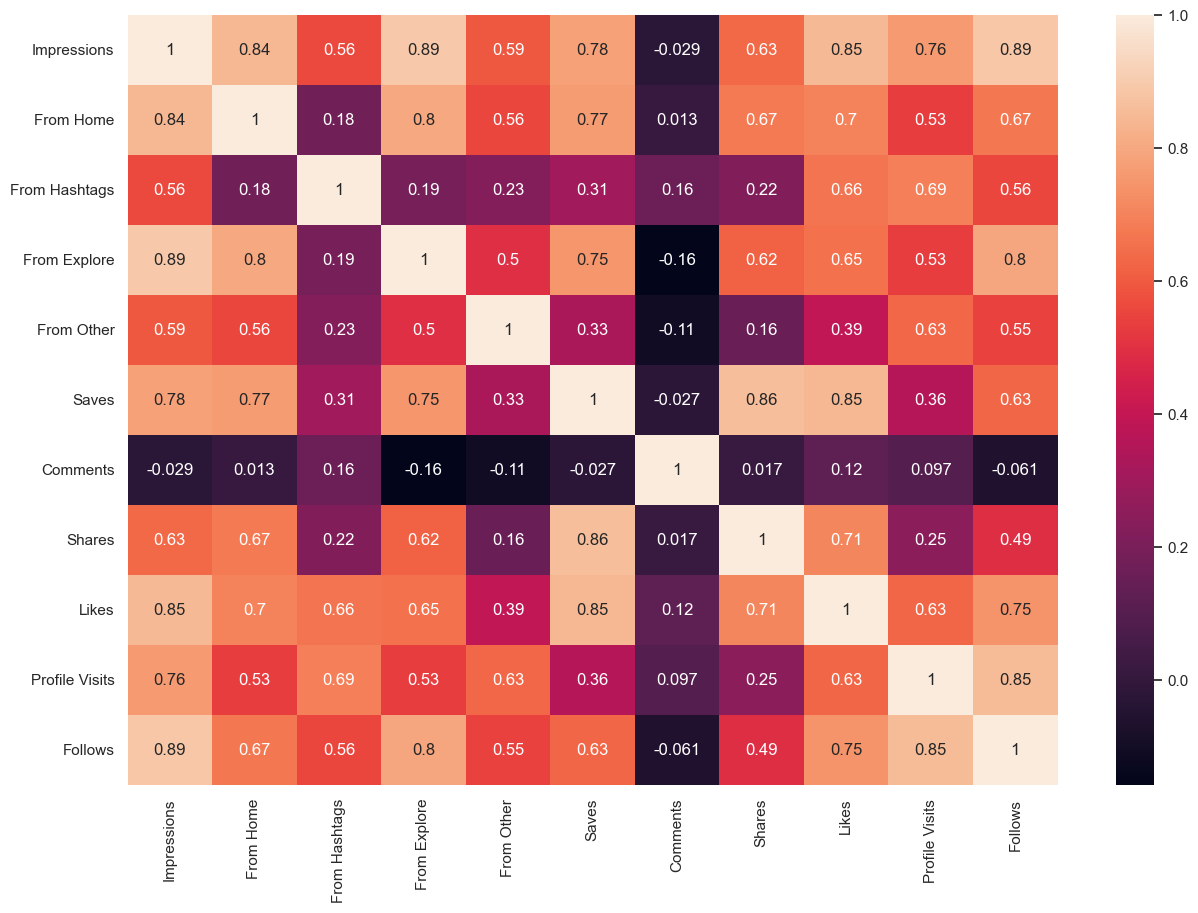

In [7]:
sns.set_theme(rc={'figure.figsize':(15,10)})
sns.heatmap(correlations, annot=True)
plt.show()

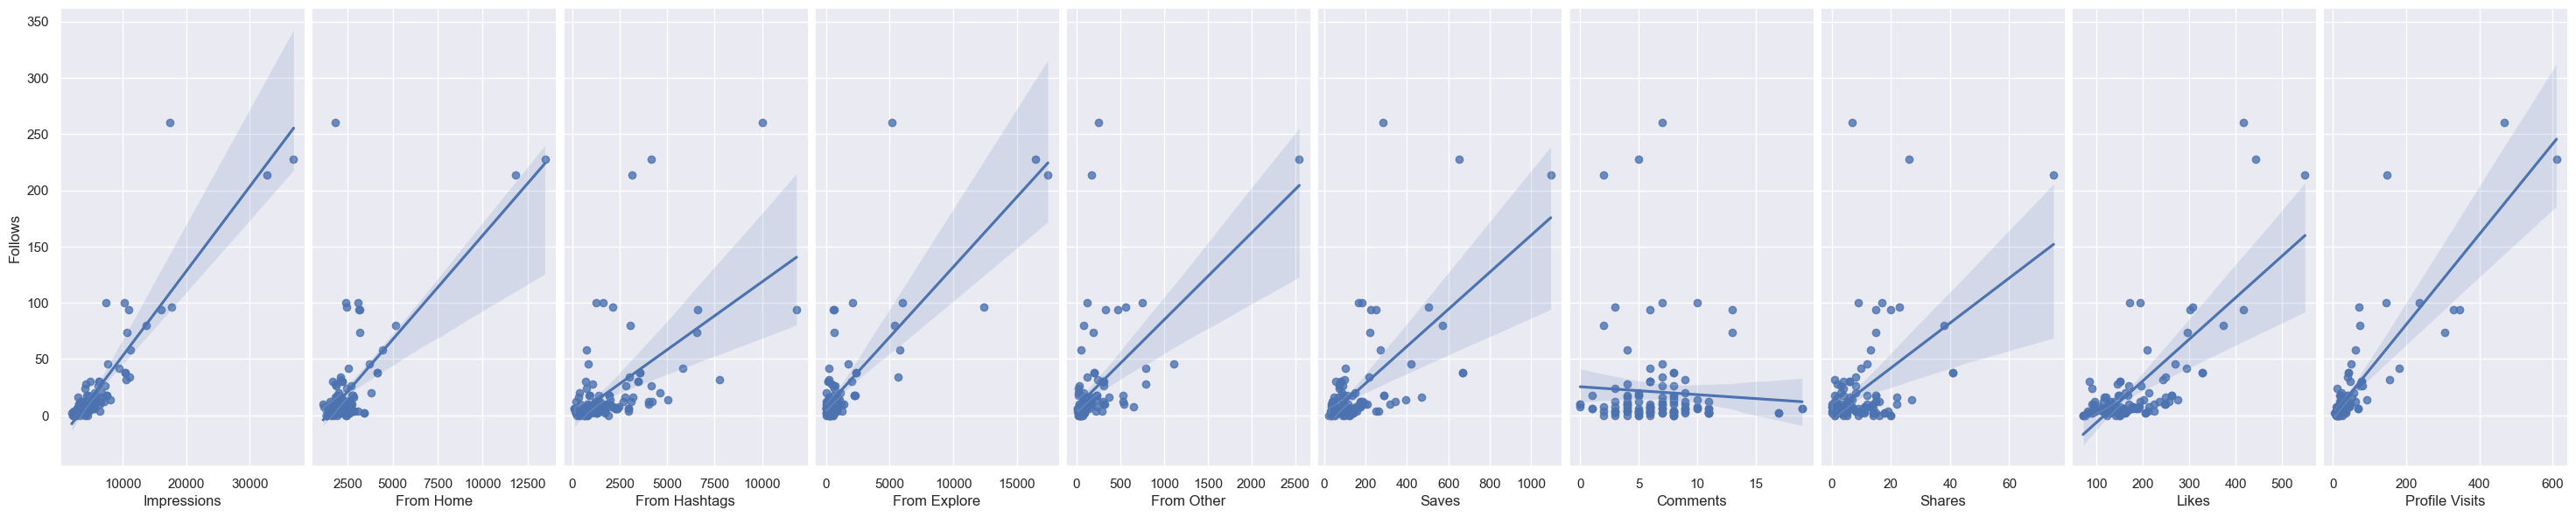

In [8]:
sns.set_theme(rc={'figure.figsize':(15,10)})
sns.pairplot(df, y_vars="Follows", x_vars=df.columns[:-1], kind='reg', height=6, aspect=0.5)
plt.show()

In [9]:
# Define features and target
X = df.drop(columns=['Follows'])
y = df['Follows']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (95, 10)
Testing features shape: (24, 10)
Training target shape: (95,)
Testing target shape: (24,)


In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
model.score(X_test, y_test)

0.8440631258902158

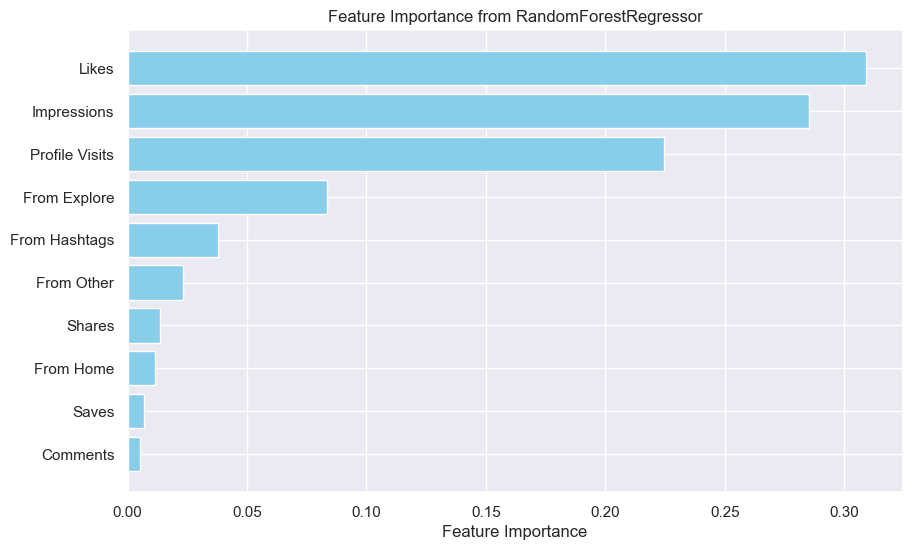

In [13]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from RandomForestRegressor')
plt.gca().invert_yaxis()
plt.show()

In [14]:
df = pd.read_csv('../data/df_analyze.csv')
df = df[["Impressions", "From Home", "From Hashtags", "From Explore", "From Other", "Saves", "Comments", "Shares", "Likes", "Profile Visits", "Follows"]]
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,3920,2586,1028,619,56,98,9,5,162,35,2
1,5394,2727,1838,1174,78,194,7,14,224,48,10
2,4021,2085,1188,0,533,41,11,1,131,62,12
3,4528,2700,621,932,73,172,10,7,213,23,8
4,2518,1704,255,279,37,96,5,4,123,8,0


In [15]:
# Drop the Comments column
df = df.drop(columns=['Comments'])
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Shares,Likes,Profile Visits,Follows
0,3920,2586,1028,619,56,98,5,162,35,2
1,5394,2727,1838,1174,78,194,14,224,48,10
2,4021,2085,1188,0,533,41,1,131,62,12
3,4528,2700,621,932,73,172,7,213,23,8
4,2518,1704,255,279,37,96,4,123,8,0


In [16]:
X = df.drop(columns=['Follows'])
y = df['Follows']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8559313273803002

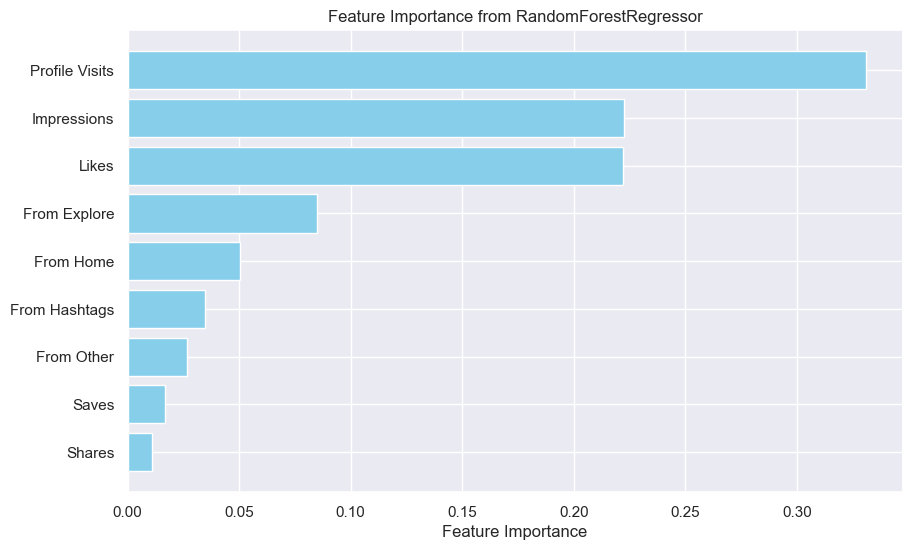

In [18]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from RandomForestRegressor')
plt.gca().invert_yaxis()
plt.show()

## Trying with different parameters

- Setting seed = 42

In [26]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7880558179029253

In [27]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8054038741305223

In [28]:
model = RandomForestRegressor(n_estimators=100, max_depth=30, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7880558179029253

In [29]:
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8127326830451351

In [30]:
model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8179721113844738

In [31]:
model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8190376643732533

In [32]:
model = RandomForestRegressor(n_estimators=300, max_depth=30, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8141519356488076

In [33]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Shares,Likes,Profile Visits,Follows
0,3920,2586,1028,619,56,98,5,162,35,2
1,5394,2727,1838,1174,78,194,14,224,48,10
2,4021,2085,1188,0,533,41,1,131,62,12
3,4528,2700,621,932,73,172,7,213,23,8
4,2518,1704,255,279,37,96,4,123,8,0


Normalize the data

In [37]:

features = df.drop(columns=['Follows'])
y = df['Follows']

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

df_normalized.head()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Shares,Likes,Profile Visits
0,-0.369863,0.074310,-0.458058,-0.176440,-0.399332,-0.355333,-0.434106,-0.143621,-0.180138
1,-0.064268,0.169380,-0.026387,0.036856,-0.322999,0.261398,0.461708,0.612181,-0.030233
2,-0.348923,-0.263493,-0.372790,-0.414332,1.255698,-0.721516,-0.832246,-0.521522,0.131203
3,-0.243810,0.151175,-0.674960,-0.056149,-0.340348,0.120064,-0.235036,0.478087,-0.318511
4,-0.660530,-0.520384,-0.870011,-0.307107,-0.465256,-0.368181,-0.533641,-0.619045,-0.491478


In [43]:
X = df_normalized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7372563599470858

- best one

In [47]:
model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8190143387369577

In [48]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [49]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Shares,Likes,Profile Visits,Follows
0,3920,2586,1028,619,56,98,5,162,35,2
1,5394,2727,1838,1174,78,194,14,224,48,10
2,4021,2085,1188,0,533,41,1,131,62,12
3,4528,2700,621,932,73,172,7,213,23,8
4,2518,1704,255,279,37,96,4,123,8,0


In [50]:
max(df['Impressions']), max(df['From Home']), max(df['From Hashtags']), max(df['From Explore']), max(df['From Other']), max(df['Saves']), max(df['Shares']), max(df['Likes']), max(df['Profile Visits']), max(df['Follows'])

(36919, 13473, 11817, 17414, 2547, 1095, 75, 549, 611, 260)